<a href="https://colab.research.google.com/github/lymc33/Precision/blob/main/Datos_COVID_Precision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Precision Detect/Resultados/TotalLimpios.csv', header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8
0,USUARIO,NOMBRE,APELLIDO,SEXO,EDAD,SINTOMAS,ID MUESTRA,FECHA EXTRACCION,RESULTADO
1,Particular,Adriana,Martínez Solis,Femenino,36.42059939301973,SIN ESPECIFICAR,PD.PD.02.0366,2020-12-02,Negativo
2,Particular,Liliana,Martínez Solis,Femenino,36.42059939301973,SIN ESPECIFICAR,PD.PD.02.0367,2020-12-02,Negativo
3,Particular,Diana,Hernández Hernández,Femenino,36.42059939301973,SIN ESPECIFICAR,PD.PD.02.0368,2020-12-02,Negativo
4,Particular,Gabriel,Márquez Michel,Masculino,36.42059939301973,SIN ESPECIFICAR,PD.PD.02.0369,2020-12-02,Negativo


In [5]:
#Cambiar el nombre de las columnas en el CSV
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [6]:
#Título de las columnas
list_of_column_names = list(df.columns)
  
# displaying the list of column names
print('List of column names : ', 
      list_of_column_names)

List of column names :  ['USUARIO', 'NOMBRE', 'APELLIDO', 'SEXO', 'EDAD', 'SINTOMAS', 'ID MUESTRA', 'FECHA EXTRACCION', 'RESULTADO']


In [7]:
df.shape

(3050, 9)

In [8]:
dfDiciembre = df[(df['FECHA EXTRACCION']> "2020-01-01") & (df['FECHA EXTRACCION']< "2021-01-01")]
dfEnero = df[(df['FECHA EXTRACCION'] >= "2021-01-01") & (df['FECHA EXTRACCION']< "2021-02-01")]
dfFebrero = df[(df['FECHA EXTRACCION'] >= "2021-02-01") & (df['FECHA EXTRACCION']< "2021-03-01")]
dfMarzo = df[(df['FECHA EXTRACCION'] >= "2021-03-01") & (df['FECHA EXTRACCION']< "2021-04-01")]
dfAbril = df[(df['FECHA EXTRACCION'] >= "2021-04-01") & (df['FECHA EXTRACCION']< "2021-05-01")]

In [9]:
#dfPrueba['FECHA EXTRACCION'].value_counts()
dfDiciembre['FECHA EXTRACCION'].value_counts()
#dfEnero['FECHA EXTRACCION'].value_counts()
#dfFebrero['FECHA EXTRACCION'].value_counts()
#dfMarzo['FECHA EXTRACCION'].value_counts()
#dfAbril['FECHA EXTRACCION'].value_counts()

2020-12-21    91
2020-12-18    85
2020-12-23    73
2020-12-15    52
2020-12-30    45
2020-12-10    44
2020-12-31    40
2020-12-14    35
2020-12-03    34
2020-12-29    32
2020-12-07    30
2020-12-22    26
2020-12-17    22
2020-12-16    22
2020-12-09    21
2020-12-02    20
2020-12-11    17
2020-12-08    13
2020-12-28    13
2020-12-04    13
2020-12-24     6
Name: FECHA EXTRACCION, dtype: int64

In [10]:
#dfDiciembre.tail()
dfEnero.tail()
#dfFebrero.tail()
#dfMarzo.tail()
#dfAbril.tail()

,USUARIO,NOMBRE,APELLIDO,SEXO,EDAD,SINTOMAS,ID MUESTRA,FECHA EXTRACCION,RESULTADO
1968,Kromberg,SILVIA LIZETH,MARQUEZ SILVA,Femenino,18.0,No,PD.KR.02.0059,2021-01-29,Negativo
1969,Kromberg,JESSICA GABRIELA,ARREGUIN CALDERON,Femenino,28.0,No,PD.KR.02.0060,2021-01-29,Negativo
1970,Particular,Isidro,Garcia Mosqueda,Masculino,67.0,Si,PD.PD.02.1724,2021-01-29,Negativo
1971,Particular,Guillermina,Aguirre Solis,Femenino,70.0,Si,PD.PD.02.1725,2021-01-29,Negativo
1972,Particular,Pablo,Munguía Gonzalez,Masculino,71.0,No,PD.PD.02.1726,2021-01-29,Negativo


In [22]:
df['RESULTADO'].value_counts()

Negativo    2392
Positivo     658
Name: RESULTADO, dtype: int64

In [42]:
gRESULTADOS = df.groupby(['SEXO', 'EDAD', 'SINTOMAS', 'RESULTADO']).count()['FECHA EXTRACCION']
print(gRESULTADOS)

SEXO       EDAD  SINTOMAS  RESULTADO
Femenino   10.0  No        Negativo     2
           11.0  No        Negativo     1
           12.0  No        Negativo     1
                 Si        Positivo     1
           13.0  No        Negativo     1
                                       ..
Masculino  81.0  No        Negativo     1
           82.0  No        Negativo     1
           86.0  Si        Positivo     1
           9.0   No        Negativo     1
                           Positivo     1
Name: FECHA EXTRACCION, Length: 453, dtype: int64


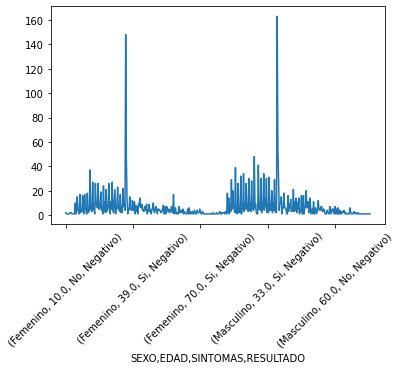

In [43]:
# plot the result
gRESULTADOS.plot()
plt.xticks(rotation=45)
plt.show()

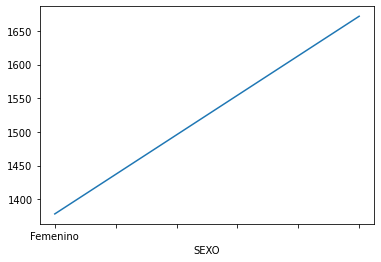

In [45]:
gRESULTADOS = df.groupby(['SEXO']).count()['RESULTADO']

gRESULTADOS.plot()
plt.show()

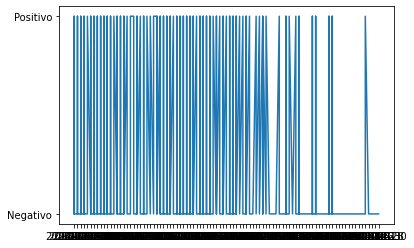

In [16]:
gRESULTADOS.describe()

0         USUARIO                     ... FECHA EXTRACCION                 
            count unique         top  ...           unique         top freq
RESULTADO                             ...                                  
Negativo     2392     28  Particular  ...               93  2021-01-11  107
Positivo      658     20  Particular  ...               68  2021-01-18   42

[2 rows x 32 columns]

In [21]:
gRESULTADOS.head()

,USUARIO,NOMBRE,APELLIDO,SEXO,EDAD,SINTOMAS,ID MUESTRA,FECHA EXTRACCION,RESULTADO
1,Particular,Adriana,Martínez Solis,Femenino,36.42059939301973,SIN ESPECIFICAR,PD.PD.02.0366,2020-12-02,Negativo
2,Particular,Liliana,Martínez Solis,Femenino,36.42059939301973,SIN ESPECIFICAR,PD.PD.02.0367,2020-12-02,Negativo
3,Particular,Diana,Hernández Hernández,Femenino,36.42059939301973,SIN ESPECIFICAR,PD.PD.02.0368,2020-12-02,Negativo
4,Particular,Gabriel,Márquez Michel,Masculino,36.42059939301973,SIN ESPECIFICAR,PD.PD.02.0369,2020-12-02,Negativo
5,Particular,María Esther,Gutiérrez Panales,Femenino,36.42059939301973,SIN ESPECIFICAR,PD.PD.02.0370,2020-12-02,Negativo
8,Particular,Norma Azucena,Beltrán Ramírez,Femenino,36.42059939301973,SIN ESPECIFICAR,PD.PD.02.0373,2020-12-02,Positivo
10,Particular,Silvia,Chacón Segovia,Femenino,36.42059939301973,SIN ESPECIFICAR,PD.PD.02.0375,2020-12-02,Positivo
12,Particular,Luis Ángel,Vences Kim,Masculino,36.42059939301973,SIN ESPECIFICAR,PD.PD.02.0377,2020-12-02,Positivo
29,Poder Judicial,RAUL,SILVA ÁVILA,Masculino,36.42059939301973,SIN ESPECIFICAR,PD.PJ.02.0009,2020-12-03,Positivo
37,Minera La Cantera,Víctor Manuel,Hernández Mendez,Masculino,36.42059939301973,SIN ESPECIFICAR,PD.MC.02.0021,2020-12-03,Positivo


In [ ]:
# Datos agrupados por sexo
#grouped_data = surveys_df.groupby('sex')

#grouped_data.describe()
#grouped_data.mean()

In [ ]:
# GRAFICAS

#Aseguremonos de que las imágenes aparezcan insertadas en iPython Notebook

#%matplotlib inline

# Creaemos una gráfica de barras

#species_counts.plot(kind='bar');

In [ ]:
# Graficar datos apilados de modo que las columnas 'one' y 'two' estén apiladas
#my_df = pd.DataFrame(d)
#my_df.plot(kind='bar',stacked=True,title="The title of my graph")


#.unstack()